<a href="https://colab.research.google.com/github/dyjdlopez/icpep-ai-workshop-2021/blob/main/day1/ICpEP_AI_D1_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Vanilla Image Processing

## Part 1: Images and Signals

### 1.1 Visualizing Signals

In [ ]:
import cv2 ## OpenCV
import matplotlib.pyplot as plt #Showing image outputs
import numpy as np # for linear algebra operations


### 1.2 Images as Tensors

In [ ]:
image = cv2.imread("lenna.png") #BGR
image.shape

(512, 512, 3)

In [ ]:
def rgb(img):
  return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

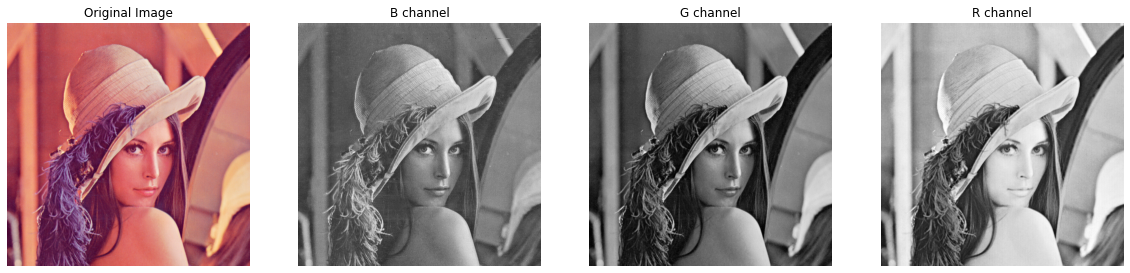

In [ ]:
b,g,r = cv2.split(image)

plt.figure(figsize=(20,16))
plt.subplot(141)
plt.title("Original Image")
plt.imshow(rgb(image))
plt.axis("off")

plt.subplot(142)
plt.title("B channel")
plt.imshow(b, cmap='gray')
plt.axis("off")

plt.subplot(143)
plt.title("G channel")
plt.imshow(g, cmap='gray')
plt.axis("off")

plt.subplot(144)
plt.title("R channel")
plt.imshow(r, cmap='gray')
plt.axis("off")

plt.show()

In [ ]:
def imshow(img):
  plt.figure(figsize=(15, 9), dpi=80) 
  plt.imshow(rgb(img))
  plt.axis("off")
  plt.show()

## Part 2: Manipulating Images

### 2.1 Geometric Manipulation

#### <i>Resizing</i>

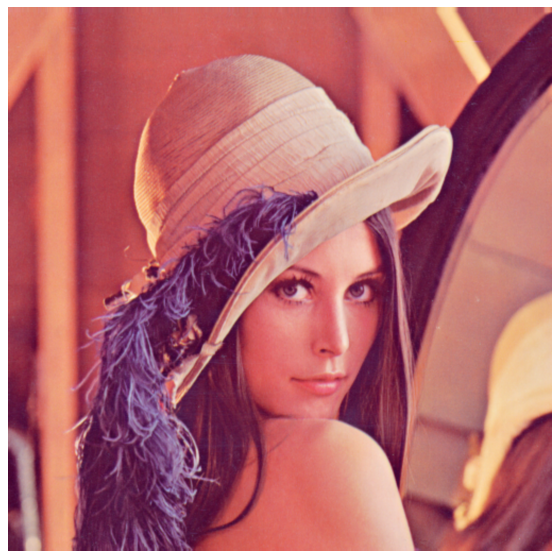

(1024, 1024, 3)


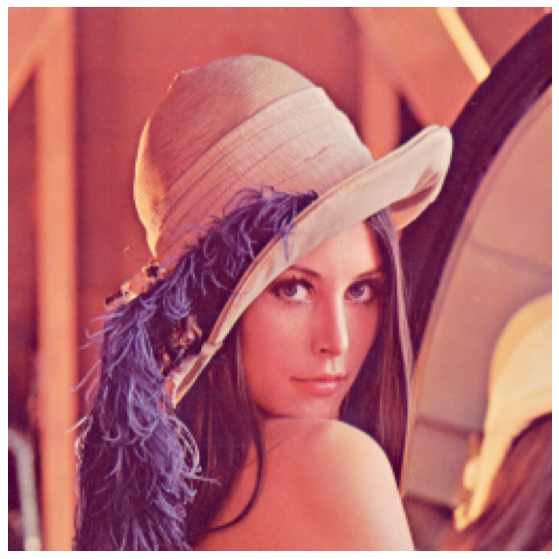

(256, 256, 3)


In [ ]:
big_img = cv2.resize(image, (image.shape[1]*2, image.shape[0]*2))
imshow(big_img)
print(big_img.shape)
small_img = cv2.resize(image, (int(image.shape[1]/2), int(image.shape[0]/2)))
imshow(small_img)
print(small_img.shape)

#### Cropping

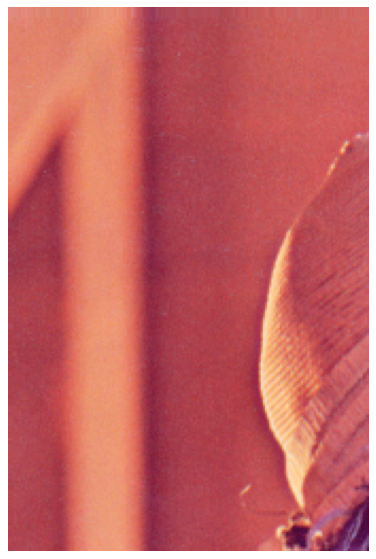

In [ ]:
x_min, x_max = 0, image.shape[0]//2
y_min, y_max = 0, image.shape[1]//3
crop_img = image[x_min:x_max, y_min:y_max]
imshow(crop_img)

### 2.3 Channel Manipulation

#### <i>Grayscaling</i>

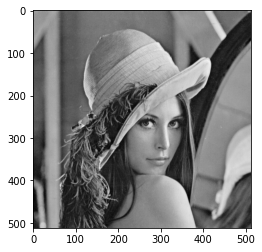

(512, 512)

In [ ]:
gray = np.mean(image, axis=-1)
plt.imshow(gray, cmap='gray')
plt.show()
gray.shape

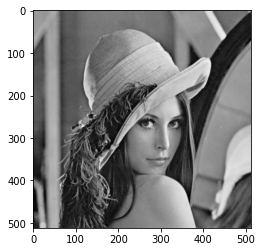

(512, 512)

In [ ]:
grey = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
plt.imshow(grey, cmap='gray')
plt.show()
grey.shape

#### <i>HSV</i>

In [ ]:
hsv_image = cv2.cvtColor(image,cv2.COLOR_BGR2HSV)

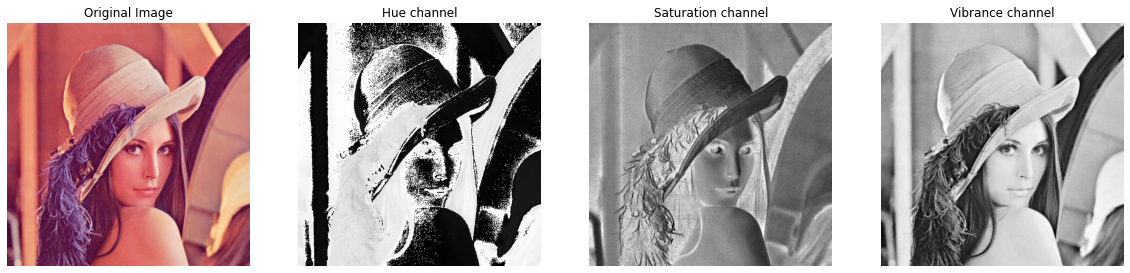

In [ ]:
h,s,v = cv2.split(hsv_image)

plt.figure(figsize=(20,16))

plt.subplot(141)
plt.title("Original Image")
plt.imshow(rgb(image))
plt.axis("off")

plt.subplot(142)
plt.title("Hue channel")
plt.imshow(h, cmap='gray')
plt.axis("off")

plt.subplot(143)
plt.title("Saturation channel")
plt.imshow(s, cmap='gray')
plt.axis("off")

plt.subplot(144)
plt.title("Vibrance channel")
plt.imshow(v, cmap='gray')
plt.axis("off")

plt.show()

#### <i>Histogram Equalization</i>

In [ ]:
## RGB Histogram Equalization
plt_img = rgb(image)
ch_rgb = cv2.split(plt_img)
colors = ("r", "g", "b")
equ_rgb= []
for channel in ch_rgb:
    equ_rgb.append(cv2.equalizeHist(channel))
hequ_rgb = cv2.merge(equ_rgb)


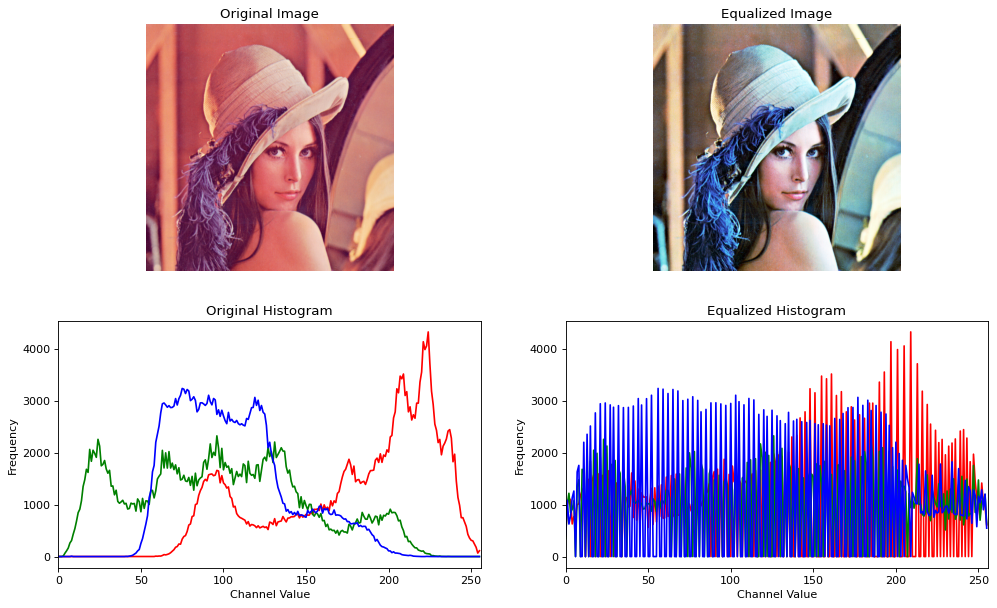

In [ ]:
plt.figure(figsize=(15, 9), dpi=80) 
plt.subplot(221) 
plt.imshow(plt_img) 
plt.title("Original Image") 
plt.axis('off') 
plt.subplot(223) 
plt.title("Original Histogram") 
plt.xlabel("Channel Value") 
plt.ylabel("Frequency") 

for (channel, color) in zip(ch_rgb, colors): 
  hist = cv2.calcHist([channel], [0], None, [256], [0, 256]) 
  plt.plot(hist, color=color) 
  plt.xlim([0, 256])

plt.subplot(222) 
plt.imshow(hequ_rgb) 
plt.title("Equalized Image") 
plt.axis('off') 
plt.subplot(224) 
plt.title("Equalized Histogram") 
plt.xlabel("Channel Value") 
plt.ylabel("Frequency") 
for (equ_channel, color) in zip(equ_rgb, colors): 
  hist = cv2.calcHist([equ_channel], [0], None, [256], [0, 256]) 
  plt.plot(hist, color=color) 
  plt.xlim([0, 256]) 
plt.show()

In [ ]:
icp## HSV Histogram Equalization
ch_hsv = cv2.split(hsv_image)
ch_hsv_eq = ch_hsv[0], ch_hsv[1], cv2.equalizeHist(ch_hsv[2])
hequ_hsv = cv2.merge(ch_hsv_eq)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  from ipykernel import kernelapp as app


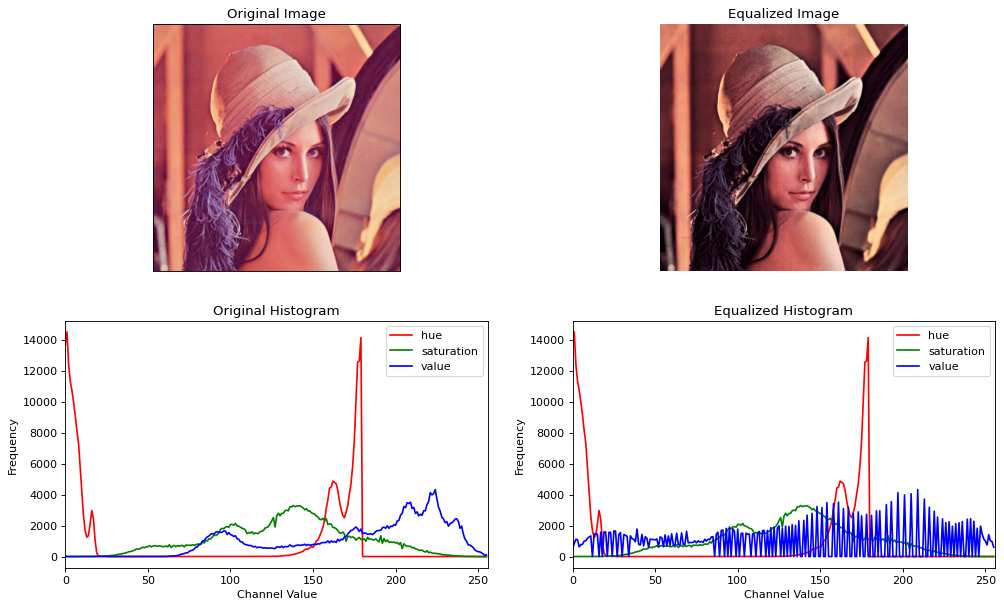

In [ ]:
plt.figure(figsize=(15, 9), dpi=80) 
plt.subplot(221), plt.title('Original Image'), plt.xticks([]), plt.yticks([]), plt.imshow(plt_img)
plt.subplot(222), plt.title('HSV Histogram Equalization'), plt.xticks([]), plt.yticks([]), plt.imshow(cv2.cvtColor(hequ_hsv,cv2.COLOR_HSV2RGB))
plt.subplot(223) 
plt.title("Original Histogram") 
plt.xlabel("Channel Value") 
plt.ylabel("Frequency") 

labels = ("hue","saturation","value")
for (channel, color, label) in zip(ch_hsv, ('r','g','b'),labels): 
  hist = cv2.calcHist([channel], [0], None, [256], [0, 256]) 
  plt.plot(hist, color=color, label=label) 
  plt.xlim([0, 256])
plt.legend()
plt.subplot(222) 
plt.imshow(cv2.cvtColor(hequ_hsv,cv2.COLOR_HSV2RGB)) 
plt.title("Equalized Image") 
plt.axis('off') 
plt.subplot(224) 
plt.title("Equalized Histogram") 
plt.xlabel("Channel Value") 
plt.ylabel("Frequency") 
for (equ_channel, color, label) in zip(ch_hsv_eq, ('r','g','b'),labels): 
  hist = cv2.calcHist([equ_channel], [0], None, [256], [0, 256]) 
  plt.plot(hist, color=color, label=label) 
  plt.xlim([0, 256]) 
plt.legend()

plt.show()

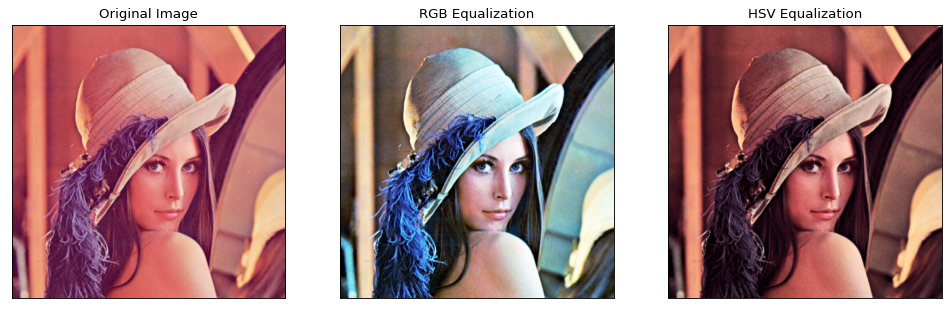

In [ ]:
plt.figure(figsize=(15, 9), dpi=80) 
plt.subplot(131), plt.title('Original Image'), plt.xticks([]), plt.yticks([]), plt.imshow(plt_img)
plt.subplot(132), plt.title('RGB Equalization'), plt.xticks([]), plt.yticks([]), plt.imshow(hequ_rgb)
plt.subplot(133), plt.title('HSV Equalization'), plt.xticks([]), plt.yticks([]), plt.imshow(cv2.cvtColor(hequ_hsv,cv2.COLOR_HSV2RGB))
plt.show()

## Part 3: Filters and Convolutions

### 3.1 Convolutions

The formula for a 2D convolution is given as:
![picture](https://graphics.stanford.edu/courses/cs178/applets/convolution-equation4-c.jpg)

Here's an animation of how convolutions work. The 5x5 matrix on the left is the original matrix or image, the 3x3 matrix is the kernel or filter in which we will convolve with the original matrix to get the resulting matric on the left.
![picture](https://miro.medium.com/max/1920/1*D6iRfzDkz-sEzyjYoVZ73w.gif)



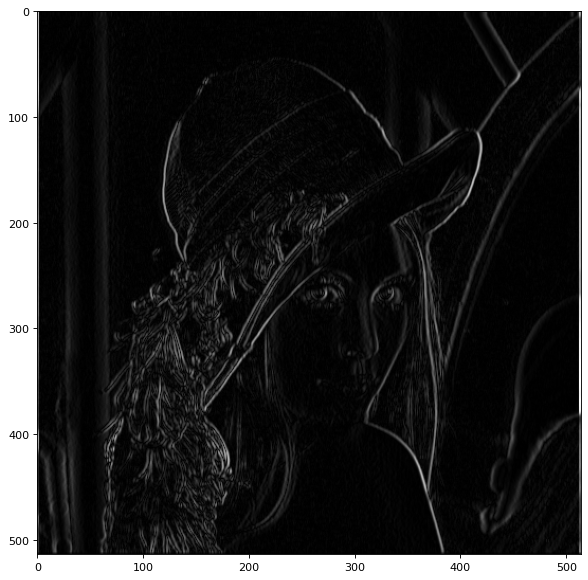

In [ ]:
from scipy.signal import convolve2d as conv
kernel = np.array([
    [1, 0, -1],
    [1, 0, -1],
    [1, 0, -1]
])
g = np.abs(conv(grey,kernel))
plt.figure(figsize=(15, 9), dpi=80) 
plt.imshow(g,cmap='gray')

### 3.2 Edge Detection

In [ ]:
sobel180 = np.array([
    [-1, -2, -1],
    [ 0,  0,  0],
    [ 1,  2,  1]
])
sobel90 = sobel180.T

In [ ]:
gx = np.abs(conv(gray,sobel90))
gy = np.abs(conv(gray,sobel180))
g = gx + gy

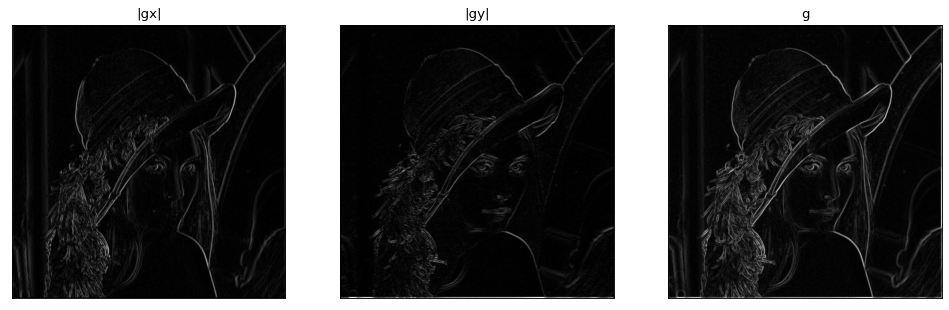

In [ ]:
plt.figure(figsize=(15, 9), dpi=80) 
plt.subplot(131), plt.title("|gx|"), plt.xticks([]), plt.yticks([]), plt.imshow(gx, cmap='gray')
plt.subplot(132), plt.title("|gy|"), plt.xticks([]), plt.yticks([]), plt.imshow(gy, cmap='gray')
plt.subplot(133), plt.title("g"), plt.xticks([]), plt.yticks([]), plt.imshow(g, cmap='gray')
plt.show()

### 3.2 Blurring

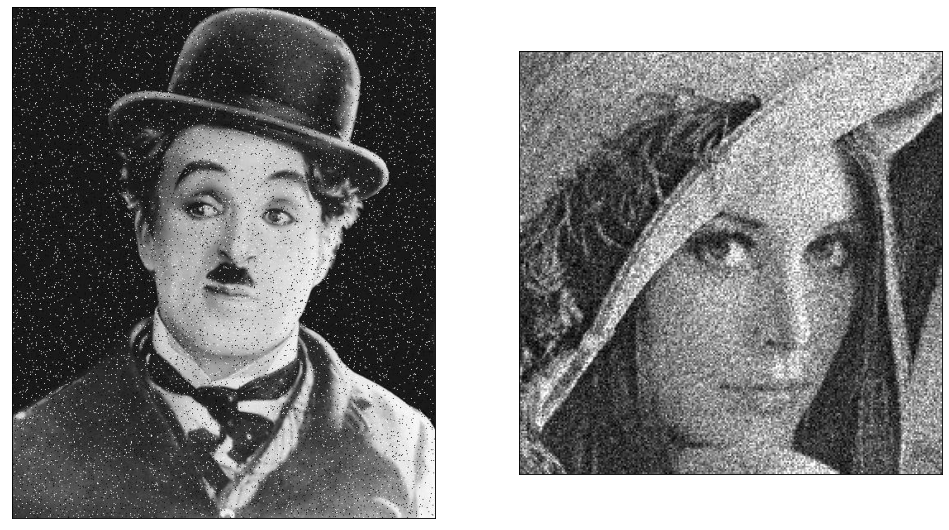

In [ ]:
noisy_images = ["charlie_noise.png","lena_noise_gray.png"]
noisy = []
for image in noisy_images:
  noisy.append(cv2.imread(image, cv2.IMREAD_GRAYSCALE))

plt.figure(figsize=(15, 9), dpi=80) 
plt.subplot(121), plt.xticks([]), plt.yticks([]), plt.imshow(noisy[0], cmap='gray')
plt.subplot(122), plt.xticks([]), plt.yticks([]), plt.imshow(noisy[1], cmap='gray')
plt.show()

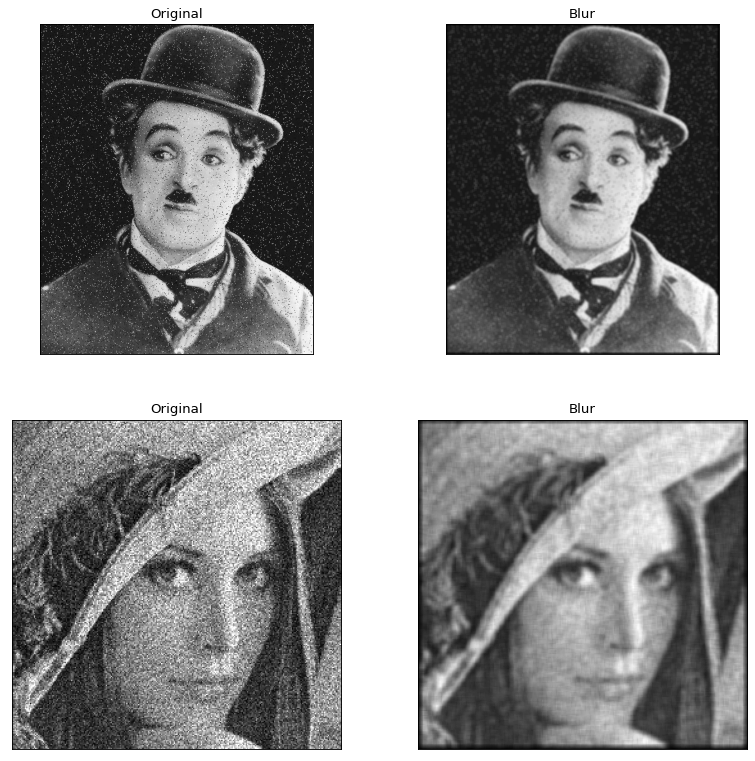

In [ ]:
dim = 5
ave_filter = np.ones((dim,dim))/(dim**dim)

ave_blurs = []
for image in noisy:
  ave_blurs.append(np.abs(conv(image,ave_filter)))

## Blur Plot
plt.figure(figsize=(12, 12), dpi=80) 
plt.subplot(221), plt.title("Original"), plt.xticks([]), plt.yticks([]), plt.imshow(noisy[0], cmap='gray')
plt.subplot(222), plt.title("Blur"), plt.xticks([]), plt.yticks([]), plt.imshow(ave_blurs[0], cmap='gray')
plt.subplot(223), plt.title("Original"), plt.xticks([]), plt.yticks([]), plt.imshow(noisy[1], cmap='gray')
plt.subplot(224), plt.title("Blur"), plt.xticks([]), plt.yticks([]), plt.imshow(ave_blurs[1], cmap='gray')
plt.show()

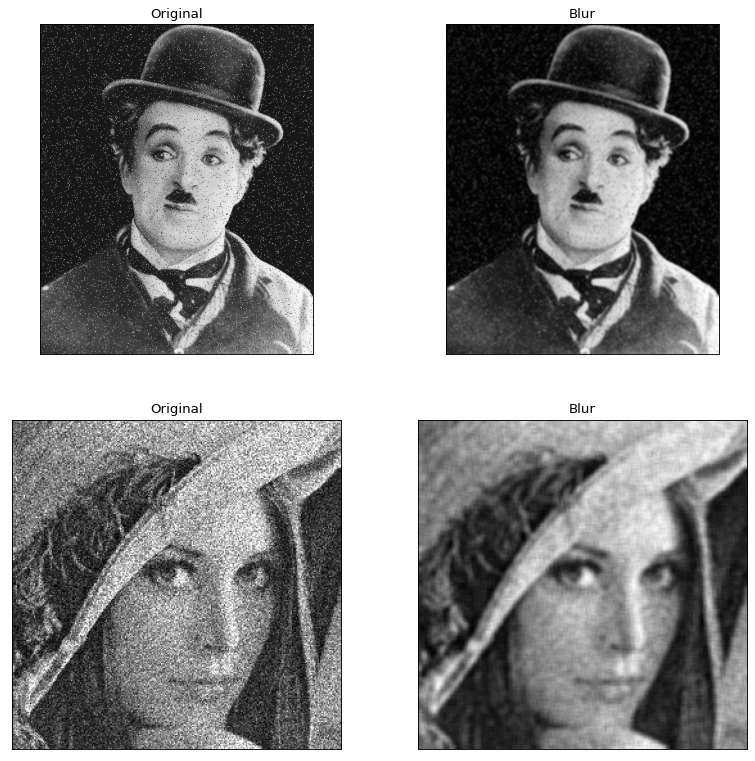

In [ ]:
## Average Blur
ave_blurs = []  
for image in noisy:
  ave_blurs.append(cv2.blur(image,(5,5)))
  
plt.figure(figsize=(12, 12), dpi=80) 
plt.subplot(221), plt.title("Original"), plt.xticks([]), plt.yticks([]), plt.imshow(noisy[0], cmap='gray')
plt.subplot(222), plt.title("Blur"), plt.xticks([]), plt.yticks([]), plt.imshow(ave_blurs[0], cmap='gray')
plt.subplot(223), plt.title("Original"), plt.xticks([]), plt.yticks([]), plt.imshow(noisy[1], cmap='gray')
plt.subplot(224), plt.title("Blur"), plt.xticks([]), plt.yticks([]), plt.imshow(ave_blurs[1], cmap='gray')
plt.show()


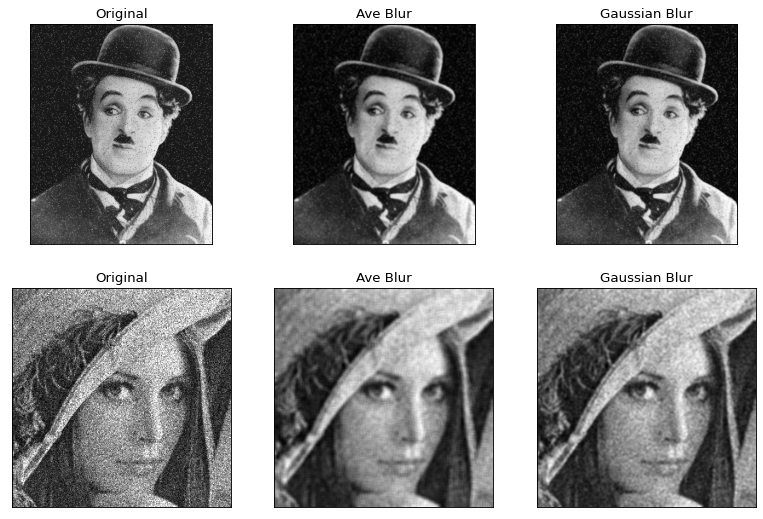

In [ ]:
# Gaussian Blur
gauss_blurs = []  
for image in noisy:
  gauss_blurs.append(cv2.GaussianBlur(image,(5,5),0))


plt.figure(figsize=(12, 8), dpi=80) 
plt.subplot(231), plt.title("Original"), plt.xticks([]), plt.yticks([]), plt.imshow(noisy[0], cmap='gray')
plt.subplot(232), plt.title("Ave Blur"), plt.xticks([]), plt.yticks([]), plt.imshow(ave_blurs[0], cmap='gray')
plt.subplot(233), plt.title("Gaussian Blur"), plt.xticks([]), plt.yticks([]), plt.imshow(gauss_blurs[0], cmap='gray')
plt.subplot(234), plt.title("Original"), plt.xticks([]), plt.yticks([]), plt.imshow(noisy[1], cmap='gray')
plt.subplot(235), plt.title("Ave Blur"), plt.xticks([]), plt.yticks([]), plt.imshow(ave_blurs[1], cmap='gray')
plt.subplot(236), plt.title("Gaussian Blur"), plt.xticks([]), plt.yticks([]), plt.imshow(gauss_blurs[1], cmap='gray')
plt.show()


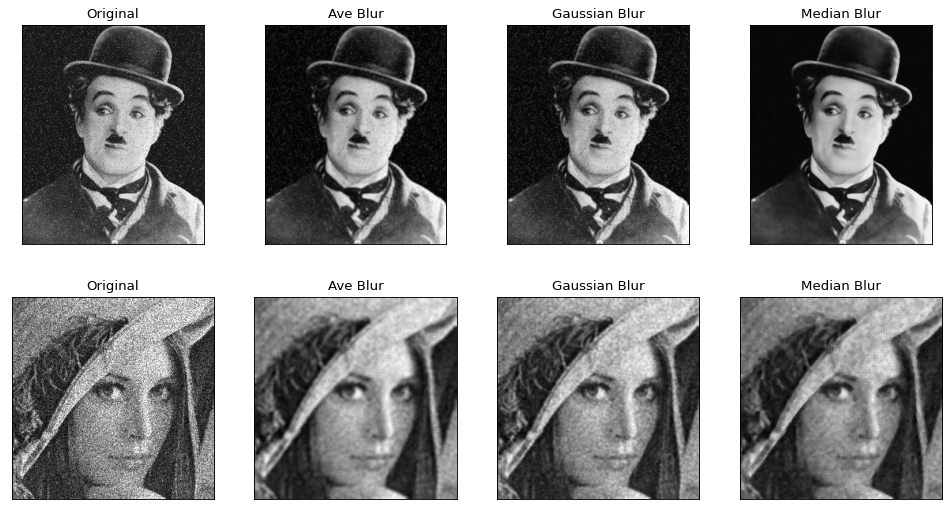

In [ ]:
## Median Blur
med_blurs = []  
for image in noisy:
  med_blurs.append(cv2.medianBlur(image, 5))

plt.figure(figsize=(15, 8), dpi=80) 
plt.subplot(241), plt.title("Original"), plt.xticks([]), plt.yticks([]), plt.imshow(noisy[0], cmap='gray')
plt.subplot(242), plt.title("Ave Blur"), plt.xticks([]), plt.yticks([]), plt.imshow(ave_blurs[0], cmap='gray')
plt.subplot(243), plt.title("Gaussian Blur"), plt.xticks([]), plt.yticks([]), plt.imshow(gauss_blurs[0], cmap='gray')
plt.subplot(244), plt.title("Median Blur"), plt.xticks([]), plt.yticks([]), plt.imshow(med_blurs[0], cmap='gray')
plt.subplot(245), plt.title("Original"), plt.xticks([]), plt.yticks([]), plt.imshow(noisy[1], cmap='gray')
plt.subplot(246), plt.title("Ave Blur"), plt.xticks([]), plt.yticks([]), plt.imshow(ave_blurs[1], cmap='gray')
plt.subplot(247), plt.title("Gaussian Blur"), plt.xticks([]), plt.yticks([]), plt.imshow(gauss_blurs[1], cmap='gray')
plt.subplot(248), plt.title("Median Blur"), plt.xticks([]), plt.yticks([]), plt.imshow(med_blurs[1], cmap='gray')
plt.show()

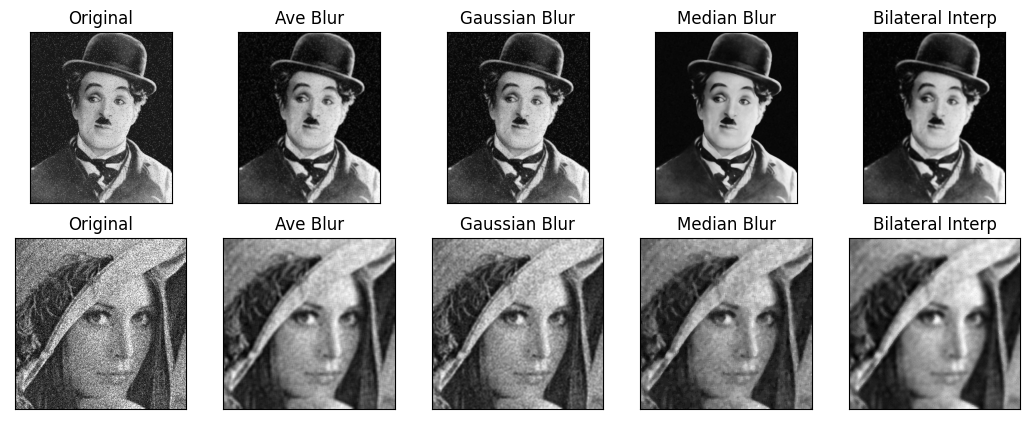

In [ ]:
# ## Bilateral Filtering
bil_blurs = []  
for image in noisy:
  bil_blurs.append(cv2.bilateralFilter(image, 9, 150,150))

plt.figure(figsize=(13, 5), dpi=100) 
plt.subplot(251), plt.title("Original"), plt.xticks([]), plt.yticks([]), plt.imshow(noisy[0], cmap='gray')
plt.subplot(252), plt.title("Ave Blur"), plt.xticks([]), plt.yticks([]), plt.imshow(ave_blurs[0], cmap='gray')
plt.subplot(253), plt.title("Gaussian Blur"), plt.xticks([]), plt.yticks([]), plt.imshow(gauss_blurs[0], cmap='gray')
plt.subplot(254), plt.title("Median Blur"), plt.xticks([]), plt.yticks([]), plt.imshow(med_blurs[0], cmap='gray')
plt.subplot(255), plt.title("Bilateral Interp"), plt.xticks([]), plt.yticks([]), plt.imshow(bil_blurs[0], cmap='gray')
plt.subplot(256), plt.title("Original"), plt.xticks([]), plt.yticks([]), plt.imshow(noisy[1], cmap='gray')
plt.subplot(257), plt.title("Ave Blur"), plt.xticks([]), plt.yticks([]), plt.imshow(ave_blurs[1], cmap='gray')
plt.subplot(258), plt.title("Gaussian Blur"), plt.xticks([]), plt.yticks([]), plt.imshow(gauss_blurs[1], cmap='gray')
plt.subplot(259), plt.title("Median Blur"), plt.xticks([]), plt.yticks([]), plt.imshow(med_blurs[1], cmap='gray')
plt.subplot(2,5,10), plt.title("Bilateral Interp"), plt.xticks([]), plt.yticks([]), plt.imshow(bil_blurs[1], cmap='gray')
plt.show()

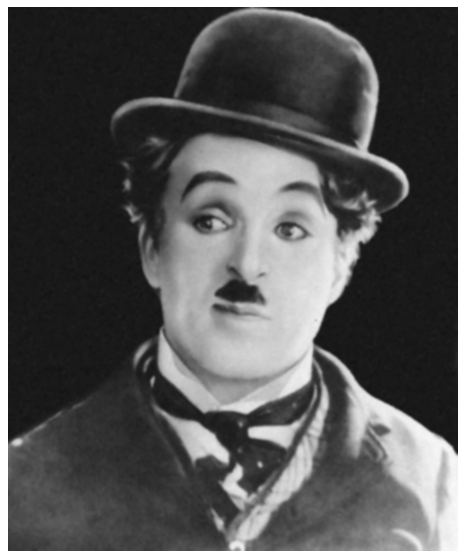

In [ ]:
charlie_noise = noisy[0]
charlie_noise = cv2.medianBlur(charlie_noise, 3)
charlie_noise = cv2.GaussianBlur(charlie_noise,(5,5),0)
imshow(charlie_noise)